In [1]:
import pandas as pd

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"

Read data from url and convert to pandas dataframe

In [3]:
df = pd.read_csv(url, header = None)

Let's see how the data looks

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The official description lists the following as the major attributes. NOTE : No. of times pregnant is the 1st attribute. There are 9 in all, including the Class Label


Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

We notice that the columns aren't labelled. Let's do that.

In [5]:
df.columns = ['Pregnant', 'Plasma','Dbp','TSFT','Serum','BMI','DPF','Age','Class']

In [6]:
df.head()

,Pregnant,Plasma,Dbp,TSFT,Serum,BMI,DPF,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Check for any missing values in the dataframe. This will save us a ton of time later on.

In [7]:
df.isnull().sum()

Pregnant    0
Plasma      0
Dbp         0
TSFT        0
Serum       0
BMI         0
DPF         0
Age         0
Class       0
dtype: int64

This is a good dataset. No missing values. A ton of preprocessing not need to be done.

In [8]:
df.describe()

,Pregnant,Plasma,Dbp,TSFT,Serum,BMI,DPF,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
import numpy as np

Now let's parse the columns and extract our training data [inputs and class labels]

In [10]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1:].values.ravel()

In [11]:
from sklearn.cross_validation import train_test_split

Do a 70-30 split.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
from sklearn.pipeline import Pipeline

In [61]:
pipe = Pipeline([('std', StandardScaler()), ('clf', LogisticRegression(C = 0.1))])

In [62]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [63]:
pipe.score(X_train, y_train)

0.76350093109869643

In [64]:
from sklearn.cross_validation import cross_val_score

In [65]:
scores = cross_val_score(estimator = pipe,
                        X = X_train,
                        y = y_train,
                        cv = 10,
                        n_jobs = 1)

In [66]:
scores

array([ 0.76363636,  0.81818182,  0.74545455,  0.72222222,  0.79245283,
        0.73584906,  0.64150943,  0.69811321,  0.79245283,  0.81132075])

Plot the training and validation accuracy to make sure we are not encountering high bias/variance. Low training accuracy 
may be for a lot of reasons. I suspect the major reason here is lack of sufficient amount of data. However, we must 
make sure we aren't missing anything.

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
from sklearn.learning_curve import learning_curve

In [69]:
train_sizes, train_scores, test_scores = learning_curve(estimator = pipe,
                                                       X = X_train,
                                                       y = y_train,
                                                       train_sizes = np.linspace(0.1, 1.0, 10),
                                                       cv = 10)

In [70]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

In [71]:
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

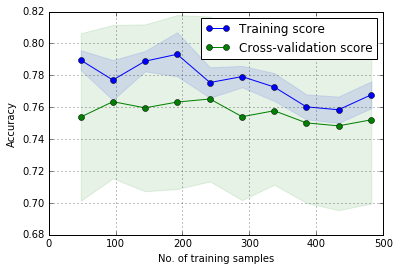

In [72]:
plt.grid()
plt.plot(train_sizes, train_mean, 'o-', color="blue",
             label="Training score")
plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, alpha=0.1,
                     color="blue")

plt.plot(train_sizes, test_mean,'o-', color="green",
             label="Cross-validation score")
plt.fill_between(train_sizes, test_mean + test_std,
                test_mean - test_std, alpha=0.1, color="green")

plt.xlabel('No. of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = "best")

This seems fine. There isn't exceptionally high bias or variance. In fact, we can see that around 400 samples, we hit
the sweet spot. 

In [73]:
pipe.score(X_test, y_test)

0.77922077922077926

In conclusion, we created a simple pipeline on the pima-indians-diabetes dataset. We evaluated our Logistic Regression model using cross-validation. Our preliminary accuracy was found to be 76.3%.
The dataset was quite clean; however there wasn't a lot of data. Our prediction accuracy is approximately 78%. This isn't exceptional by a long stretch. It is suspected that more data and more USEFUL features would boost this accuracy 
further.
Using other models like SVMs may also do the same.